# Activity 4


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

Using TensorFlow backend.


In [2]:
# Load The dataset
X = pd.read_csv('data/HCV_feats.csv')
y = pd.read_csv('data/HCV_target.csv')

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", y['AdvancedFibrosis'].unique())

Number of Examples in the Dataset =  1385
Number of Features for each example =  28
Possible Output Classes =  [0 1]


Set up a seed for random number generator so the result will be reproducible

Split the dataset into training set and test set with a 80-20 ratio

In [3]:
seed = 1
np.random.seed(seed)

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Print the information regarding dataset sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print ("Number of examples in training set = ", X_train.shape[0])
print ("Number of examples in test set = ", X_test.shape[0])

(1108, 28)
(1108, 1)
(277, 28)
(277, 1)
Number of examples in training set =  1108
Number of examples in test set =  277


In [4]:
np.random.seed(seed)

# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 3, activation = 'tanh', input_dim=X_train.shape[1]))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 87        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [5]:
# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_split=0.1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 159us/step - loss: 0.6987 - accuracy: 0.4995 - val_loss: 0.6903 - val_accuracy: 0.5315
Epoch 2/100
997/997 [==============================] - 0s 67us/step - loss: 0.6978 - accuracy: 0.5045 - val_loss: 0.6898 - val_accuracy: 0.5315
Epoch 3/100
997/997 [==============================] - 0s 53us/step - loss: 0.6970 - accuracy: 0.5015 - val_loss: 0.6893 - val_accuracy: 0.5315
Epoch 4/100
997/997 [==============================] - 0s 63us/step - loss: 0.6964 - accuracy: 0.5075 - val_loss: 0.6890 - val_accuracy: 0.5315
Epoch 5/100
997/997 [==============================] - 0s 53us/step - loss: 0.6959 - accuracy: 0.5005 - val_loss: 0.6887 - val_accuracy: 0.5315
Epoch 6/100
997/997 [==============================] - 0s 63us/step - loss: 0.6954 - accuracy: 0.5055 - val_loss: 0.6885 - val_accuracy: 0.5225
Epoch 7/100
997/997 [==============================] - 0s 59us/step - loss: 0.6949 - accu

997/997 [==============================] - 0s 48us/step - loss: 0.6916 - accuracy: 0.5206 - val_loss: 0.6867 - val_accuracy: 0.5586
Epoch 58/100
997/997 [==============================] - 0s 50us/step - loss: 0.6916 - accuracy: 0.5196 - val_loss: 0.6867 - val_accuracy: 0.5586
Epoch 59/100
997/997 [==============================] - 0s 50us/step - loss: 0.6915 - accuracy: 0.5196 - val_loss: 0.6866 - val_accuracy: 0.5586
Epoch 60/100
997/997 [==============================] - 0s 49us/step - loss: 0.6916 - accuracy: 0.5216 - val_loss: 0.6866 - val_accuracy: 0.5586
Epoch 61/100
997/997 [==============================] - 0s 48us/step - loss: 0.6915 - accuracy: 0.5196 - val_loss: 0.6866 - val_accuracy: 0.5586
Epoch 62/100
997/997 [==============================] - 0s 51us/step - loss: 0.6915 - accuracy: 0.5226 - val_loss: 0.6866 - val_accuracy: 0.5676
Epoch 63/100
997/997 [==============================] - 0s 47us/step - loss: 0.6915 - accuracy: 0.5196 - val_loss: 0.6866 - val_accuracy: 0.567

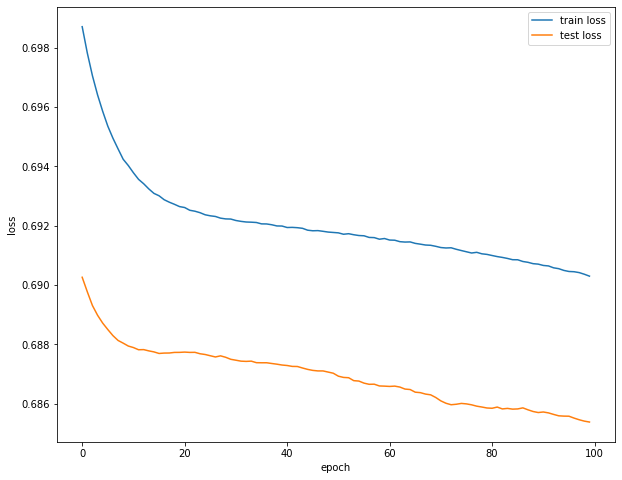

In [6]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

In [7]:
# print the best accuracy reached on training set and the test set
print(f"Best Accuracy on training set = {max(history.history['accuracy'])*100:.3f}%")
print(f"Best Accuracy on validation set = {max(history.history['val_accuracy'])*100:.3f}%") 

test_loss, test_acc = classifier.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

Best Accuracy on training set = 52.959%
Best Accuracy on validation set = 58.559%
277/277 [==============================] - 0s 25us/step
The loss on the test set is 0.6885 and the accuracy is 55.235%


In [8]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)

# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 4, activation = 'tanh', input_dim = X_train.shape[1]))
classifier.add(Dense(units = 2, activation = 'tanh'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 116       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_split=0.1)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 169us/step - loss: 0.8915 - accuracy: 0.4845 - val_loss: 0.9305 - val_accuracy: 0.4414
Epoch 2/100
997/997 [==============================] - 0s 64us/step - loss: 0.8432 - accuracy: 0.4875 - val_loss: 0.8811 - val_accuracy: 0.4414
Epoch 3/100
997/997 [==============================] - 0s 56us/step - loss: 0.8074 - accuracy: 0.4905 - val_loss: 0.8436 - val_accuracy: 0.4414
Epoch 4/100
997/997 [==============================] - 0s 64us/step - loss: 0.7812 - accuracy: 0.4935 - val_loss: 0.8144 - val_accuracy: 0.4505
Epoch 5/100
997/997 [==============================] - 0s 71us/step - loss: 0.7618 - accuracy: 0.4975 - val_loss: 0.7921 - val_accuracy: 0.4505
Epoch 6/100
997/997 [==============================] - 0s 57us/step - loss: 0.7474 - accuracy: 0.5045 - val_loss: 0.7745 - val_accuracy: 0.4505
Epoch 7/100
997/997 [==============================] - 0s 68us/step - loss: 0.7365 - accu

997/997 [==============================] - 0s 50us/step - loss: 0.6862 - accuracy: 0.5537 - val_loss: 0.6916 - val_accuracy: 0.5045
Epoch 58/100
997/997 [==============================] - 0s 56us/step - loss: 0.6860 - accuracy: 0.5557 - val_loss: 0.6916 - val_accuracy: 0.4955
Epoch 59/100
997/997 [==============================] - 0s 52us/step - loss: 0.6858 - accuracy: 0.5507 - val_loss: 0.6916 - val_accuracy: 0.4955
Epoch 60/100
997/997 [==============================] - 0s 52us/step - loss: 0.6857 - accuracy: 0.5567 - val_loss: 0.6917 - val_accuracy: 0.4955
Epoch 61/100
997/997 [==============================] - 0s 52us/step - loss: 0.6856 - accuracy: 0.5587 - val_loss: 0.6918 - val_accuracy: 0.4955
Epoch 62/100
997/997 [==============================] - 0s 52us/step - loss: 0.6854 - accuracy: 0.5507 - val_loss: 0.6918 - val_accuracy: 0.4865
Epoch 63/100
997/997 [==============================] - 0s 52us/step - loss: 0.6853 - accuracy: 0.5527 - val_loss: 0.6918 - val_accuracy: 0.486

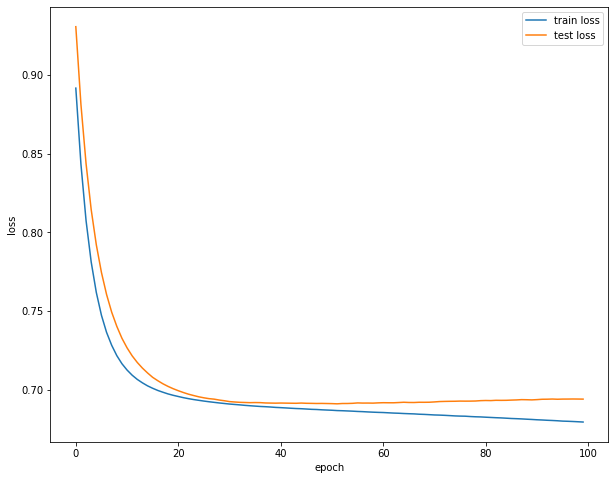

In [10]:
# plot training error and test error plots 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

In [11]:
# print the best accuracy reached on training set and the test set
print(f"Best Accuracy on training set = {max(history.history['accuracy'])*100:.3f}%")
print(f"Best Accuracy on test set = {max(history.history['val_accuracy'])*100:.3f}%")

test_loss, test_acc = classifier.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and the accuracy is {test_acc*100:.3f}%')

Best Accuracy on training set = 57.272%
Best Accuracy on test set = 54.054%
277/277 [==============================] - 0s 41us/step
The loss on the test set is 0.7016 and the accuracy is 49.819%
